# OSMnx features demo

Get street networks anywhere in the world from OpenStreetMap data then analyze and visualize them.

More info:

  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [8]:
import networkx as nx
import numpy as np
import geopandas as gpd
import fiona
import osmnx as ox
import requests
import skmob
import pandas as pd
import json
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import fiona
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon

warnings.filterwarnings(action='once')
import matplotlib.cm as cm
import matplotlib.colors as colors
import statistics

ox.config(use_cache=True, log_console=True)
ox.__version__

'1.0.1'

/Users/callieclark/anaconda3/envs/skmob/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


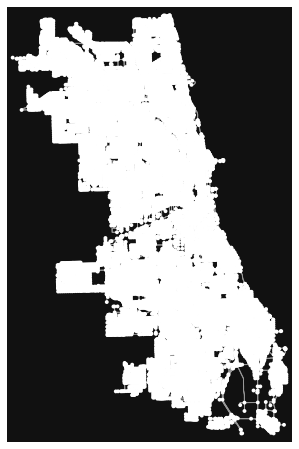

In [9]:
# get the walking network for piedmont
place = 'Chicago, Illinois, USA'
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G)

In [10]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

/Users/callieclark/anaconda3/envs/skmob/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


756338315.2232074

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

## Visualize street centrality

In [11]:
# assign speeds and traversal times to the edges
for u, v, k, d in G.edges(keys=True, data=True):
    if 'residential' in d['highway']:
        d['speed'] = 20
    elif 'tertiary' in d['highway']:
        d['speed'] = 30
    elif 'secondary' in d['highway']:
        d['speed'] = 40
    else:
        d['speed'] = 25
    
    # calculate time to traverse edge, in minutes
    d['time'] = d['length'] / (d['speed'] * 1609.34 / 60) #miles/hour to meters/minute

## Importing Crime Data (To be used later)....  for simulating an average crime scenario... Best case, Worst case and Average Crime Rate Data Statistic

In [12]:
#Only run at beginning
#big_poppa_df=pd.DataFrame() 

In [13]:
#np.size(big_poppa_df)

NameError: name 'big_poppa_df' is not defined

In [14]:
#daily_profile='all_data_0.5_0_timestamp.csv'
#daily_profile='fall_0.5_0_timestamp.csv'
#daily_profile='spring_0.5_0_timestamp.csv'
#daily_profile='winter_0.5_0_timestamp.csv'
#daily_profile='summer_0.5_0_timestamp.csv'

#daily_profile='all_data_worst_case_0_timestamp.csv'
#daily_profile='spring_worst_case_0_timestamp.csv'
#daily_profile='summer_worst_case_0_timestamp.csv'
#daily_profile='winter_worst_case_0_timestamp.csv'
daily_profile='fall_worst_case_0_timestamp.csv'

In [15]:
grouping='Violent'
#grouping='Index'

In [16]:
data = pd.read_csv('Chicago_Data/'+daily_profile)
#data = pd.read_csv('Chicago_Data/all_data_worst_case_0_timestamp.csv')
data['user_id']=1

data['Timestamp']=pd.to_datetime(data['Timestamp']).dt.tz_localize(None)
if len(data['Timestamp'].dt.date.unique())==1:
    t0=(data['Timestamp'].dt.date.unique()[0]).strftime('%Y-%m-%d %H:%M:%S')
else:
    print("More Data than one day is passed in, only first day evaluated")
    t0=(data['Timestamp'].dt.date.unique()[0]).strftime('%Y-%m-%d %H:%M:%S')
data['Timestamp']=data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [17]:
t0

'2014-10-01 00:00:00'

In [18]:
data

,Timestamp,Latitude,Longitude,#Responders,Police,Priority,Service Time,user_id
0,2014-10-01 00:00:00,41.804966,-87.741861,2,0,3,0 days 00:20:00,1
1,2014-10-01 00:00:00,41.901600,-87.682101,2,1,2,0 days 00:21:00,1
2,2014-10-01 00:00:00,41.807285,-87.604325,2,1,2,0 days 00:24:00,1
3,2014-10-01 00:00:00,41.788987,-87.741480,2,1,2,0 days 00:23:00,1
4,2014-10-01 00:00:00,41.941934,-87.722377,2,0,3,0 days 00:25:00,1
...,...,...,...,...,...,...,...,...
893,2014-10-01 23:45:00,41.878039,-87.639937,2,1,1,0 days 00:27:00,1
894,2014-10-01 23:45:00,41.751326,-87.552890,2,0,3,0 days 00:26:00,1
895,2014-10-01 23:47:00,41.854298,-87.732913,2,0,3,0 days 00:19:00,1
896,2014-10-01 23:55:00,41.964251,-87.734525,2,1,2,0 days 00:19:00,1


In [19]:
# Violent = data.groupby(['Priority']).get_group(1)
# index = data.groupby(['Priority']).get_group(2)

# frames = [Violent, index]
# result = pd.concat(frames,sort='True')

# Violent_grouped = result.sort_index(axis=0)
# NonViolent_grouped = data.groupby(['Priority']).get_group(3)

# Index_grouped=data.groupby(['Police']).get_group(1)
# NonIndex_grouped=data.groupby(['Police']).get_group(0)

/Users/callieclark/anaconda3/envs/skmob/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:

def create_groups(grouping):
    if grouping=='Violent':
        print('Groups are Violent and Non-violent')
        #Violent = data.groupby(['Priority']).get_group(1)
        prop = data.groupby(['Priority']).get_group(2)
        non_index = data.groupby(['Priority']).get_group(3)
        

        frames = [prop, non_index]
        result = pd.concat(frames,sort='True')

        Group1 = data.groupby(['Priority']).get_group(1)#result.sort_index(axis=0)#Violent
        Group2 = result.sort_index(axis=0)#Nonviolent
        
    elif grouping=='Index':
        print('Groups are Index and Non-index')
#         Group1=data.groupby(['Police']).get_group(1) #index
#         Group2=data.groupby(['Police']).get_group(0)#non-index
        Violent = data.groupby(['Priority']).get_group(1)
        prop = data.groupby(['Priority']).get_group(2)
        result = pd.concat([Violent,prop],sort='True')
        Group1=result.sort_index(axis=0)
        Group2=data.groupby(['Priority']).get_group(3)
    
    else:
        print('ERROR in Specification')
    
    return Group1,Group2

#below the labels stay consistent whether inde or violent bc everything is hardcoded 
#To Do Change this way of specifying
#Violent_grouped,NonViolent_grouped=create_groups(Violent=True, Index=False)
Violent_grouped,NonViolent_grouped=create_groups(grouping)

Groups are Violent and Non-violent


In [21]:
VG = Violent_grouped.reset_index()
NVG = NonViolent_grouped.reset_index()



In [22]:
Violent_crime_data = VG[[ 'Timestamp','Latitude', 'Longitude','Priority','Service Time']]
NonViolent_crime_data = NVG[[ 'Timestamp','Latitude', 'Longitude','Priority','Service Time']]



In [23]:
crime_data = data[[ 'Timestamp','Latitude', 'Longitude','Priority','Service Time']] 
crime_data.head()

,Timestamp,Latitude,Longitude,Priority,Service Time
0,2014-10-01 00:00:00,41.804966,-87.741861,3,0 days 00:20:00
1,2014-10-01 00:00:00,41.901600,-87.682101,2,0 days 00:21:00
2,2014-10-01 00:00:00,41.807285,-87.604325,2,0 days 00:24:00
3,2014-10-01 00:00:00,41.788987,-87.741480,2,0 days 00:23:00
4,2014-10-01 00:00:00,41.941934,-87.722377,3,0 days 00:25:00


## Importing Police Location Data (Using that as location for police for basic simulation)

In [24]:
PS_data = pd.read_csv('Simulation_Data/Police_Stations_-_Map.csv')#, sep = " ", names = ['time', 'lon', 'lat'])
PS_data['user_id']=1

cr_lat=[]
cr_long=[]

for i in range(len(PS_data)):
    s = PS_data['LOCATION'][i]
    s= s[1:-1]
    f = [float(x) for x in s.split(", ")]
    cr_lat.append(f[0])
    cr_long.append(f[1])

PS_data['lat']=cr_lat
PS_data['long']=cr_long


/Users/callieclark/anaconda3/envs/skmob/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
Gs = ox.utils_graph.get_largest_component(G, strongly=True)


In [26]:
PC_node=[]

for i in range(len(PS_data)):
    t = (ox.get_nearest_node(Gs, (cr_lat[i], cr_long[i])))
    PC_node.append(t)


In [27]:
class ndk:
    G=[]
    nodes=[]
    SPL={}
    def calc():
        for i in ndk.nodes:
            ndk.SPL[i]=nx.shortest_path_length(ndk.G, source=i, weight='time')
    def shortest_path_length(G, source, target, weight='none'):
        return ndk.SPL[source][target]
ndk.G=Gs
ndk.nodes=PC_node
ndk.calc()

In [28]:
def Cloning(li1): 
    li_copy = li1[:] 
    return li_copy

In [29]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [30]:
class Police:
    def __init__(self,ID,G,loc,resp,dt):
        self.ID=ID #a unique id
        self.G=G #pointer to the graph the officer travels on (Warning:edits to this graph have global consequences)
        self.loc=loc #the Node that the police officer is at
        self.resp=resp #true if the officer is responding to a crime event, false if patroling
        self.downtime=dt #Remaining time that the police is "down" due to a response event
        self.nodeInd=self.getNodeInd() #the index of the node that the officer is located in list(G.nodes())
    
    #tested
    #Randomly move the officer to an adjacent node if they are not responding
    def walk(self):
        if not(self.resp):
            wk= list(nx.classes.function.all_neighbors(self.G,(list(self.G.nodes)[self.nodeInd])))
            j = np.random.choice(wk)
            self.updateLoc(j)
            
    #moves the police officer toward the node they need to respond to
    def respond(self):
        if self.resp:
            return
    
    #updates the police location (no matter if they are responding or patroling)
    def update(self):
        i.walk()
        i.respond()
        
    #updates the location of the officer to the new Node (and changes the node ID)
    def updateLoc(self,newloc):
        self.loc=newloc
        self.nodeInd=self.getNodeInd()
        
    #gets the index of the node that corresponds to its ID
    def getNodeInd(self):
        return list(self.G.nodes).index(self.loc)

In [31]:
#initialize police officers as a list of variable from the class "Police"
NumberOfPolice=10
#Pol_loc=np.random.choice(len(G.nodes),size=(1,10),replace=False)
Police_officers=[]
for i in range(len(PC_node)):
    Pol_loc=PC_node[i]
    Police_officers.append(Police(i,G,Pol_loc,False,0))


## Evaluating Response time based on the nearest police location to the crime

## Initialize varibales : no of police associated with police location, no of police needed based on crime, 

In [32]:
crime_node=[]
Crime_geo =[]

for i in range(len(crime_data)):
    t = (ox.get_nearest_node(Gs, (crime_data['Latitude'][i], crime_data['Longitude'][i])))
    x = Point(crime_data['Longitude'][i],crime_data['Latitude'][i])
    Crime_geo.append(x)    
    crime_node.append(t)

In [33]:
VG_crime_node=[]
VG_Crime_geo=[]

for i in range(len(Violent_crime_data)):
    t = (ox.get_nearest_node(Gs, (Violent_crime_data['Latitude'][i], Violent_crime_data['Longitude'][i])))
    x = Point(Violent_crime_data['Longitude'][i],Violent_crime_data['Latitude'][i])
    VG_Crime_geo.append(x)
    VG_crime_node.append(t)

In [34]:
NVG_crime_node=[]
NVG_Crime_geo=[]

for i in range(len(NonViolent_crime_data)):
    t = (ox.get_nearest_node(Gs, (NonViolent_crime_data['Latitude'][i], NonViolent_crime_data['Longitude'][i])))
    x = Point(NonViolent_crime_data['Longitude'][i],NonViolent_crime_data['Latitude'][i])
    NVG_Crime_geo.append(x)
    NVG_crime_node.append(t)

In [35]:
# This cell is to create time sequence in sec for crime data
# t0 is the time data for the day which is chosen from the crime data analysis.

from datetime import datetime
datetime_object=[]
VG_datetime_object=[]
NVG_datetime_object=[]
#t0 = '2014-08-01 00:00:00'  # worst case day
#t0 = '2014-10-28 00:00:00'  # median case day
print('Day Evaluating: ',t0)

t_ini = datetime.strptime(t0, '%Y-%m-%d %H:%M:%S')
time_seq=[]
VG_time_seq=[]
NVG_time_seq=[]

s0 ='00:00:00'
srvtime_object=[]
ser_time =[]
ss_ini = datetime.strptime(s0, '%H:%M:%S')

VG_srvtime_object=[]
VG_ser_time =[]

NVG_srvtime_object=[]
NVG_ser_time =[]

for i in range(len(crime_data)):
    datetime_str = crime_data['Timestamp'][i]
    datetime_object.append(datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S'))
    tt = (datetime_object[i]-t_ini).total_seconds()
    time_seq.append(tt)
    
    srvtime_str = crime_data['Service Time'][i]
    srvtime_object.append(datetime.strptime(srvtime_str[7:-1],'%H:%M:%S'))
    ss = (srvtime_object[i]-ss_ini).total_seconds()
    ser_time.append(ss)
    
for i in range(len(Violent_crime_data)):
    datetime_str = Violent_crime_data['Timestamp'][i]
    VG_datetime_object.append(datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S'))
    tt = (VG_datetime_object[i]-t_ini).total_seconds()
    VG_time_seq.append(tt)
    
    srvtime_str = Violent_crime_data['Service Time'][i]
    VG_srvtime_object.append(datetime.strptime(srvtime_str[7:-1],'%H:%M:%S'))
    ss = (VG_srvtime_object[i]-ss_ini).total_seconds()
    VG_ser_time.append(ss)


for i in range(len(NonViolent_crime_data)):
    datetime_str = NonViolent_crime_data['Timestamp'][i]
    NVG_datetime_object.append(datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S'))
    tt = (NVG_datetime_object[i]-t_ini).total_seconds()
    NVG_time_seq.append(tt)
    
    srvtime_str = NonViolent_crime_data['Service Time'][i]
    NVG_srvtime_object.append(datetime.strptime(srvtime_str[7:-1],'%H:%M:%S'))
    ss = (NVG_srvtime_object[i]-ss_ini).total_seconds()
    NVG_ser_time.append(ss)


Day Evaluating:  2014-10-01 00:00:00


In [36]:
time_min = [x / 60 for x in time_seq]
ser_min = [x / 60 for x in ser_time]
Crime = [time_min,crime_node,ser_min,Crime_geo]

In [37]:
VG_time_min = [x / 60 for x in VG_time_seq]
VG_ser_min = [x / 60 for x in VG_ser_time]
VG_Crime = [VG_time_min,VG_crime_node,VG_ser_min,VG_Crime_geo]


NVG_time_min = [x / 60 for x in NVG_time_seq]
NVG_ser_min = [x / 60 for x in NVG_ser_time]
NVG_Crime = [NVG_time_min,NVG_crime_node,NVG_ser_min,NVG_Crime_geo]

In [42]:
VG_Crime[3]

In [254]:
police = PC_node


## Police Beats

In [255]:

multipol = fiona.open("Simulation_Data/Chicago_PB.shp")
multi= multipol.next()

In [256]:
fp = "Simulation_Data/Chicago_PB.shp"
polys  = gpd.read_file(fp)

In [257]:
## This is to change the 33 police beat which is basically water to the surrounding police beat which is land

polys['dist_num'][2] = '16'
polys['dist_num'][3] = '16'
polys['dist_num'][7] = '22'

In [258]:
southern = polys[polys['dist_num']=='7']
poly = southern['geometry']

In [259]:
geometry =[Point (xy) for xy in zip(PS_data['long'],PS_data['lat'])]

In [260]:
geo_df = gpd.GeoDataFrame(PS_data,geometry = geometry)

<AxesSubplot:>

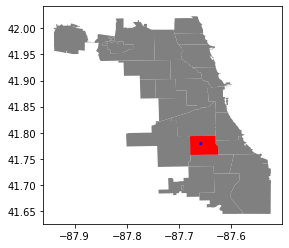

In [261]:
fig, ax = plt.subplots()

polys.plot(ax=ax, facecolor='gray');
southern.plot(ax=ax, facecolor='red');
geo_df[geo_df['DISTRICT'] == '7'].plot(ax=ax, color='blue', markersize=5)


In [262]:
import warnings
warnings.filterwarnings("ignore")

In [263]:
## Pre-assigning the Police station node to polys (## done to make the code run faster)

polys['node']=1
for x in range(len(polys)):    
    dis_t= polys['dist_num'][x]        
    te = PS_data[PS_data['DISTRICT'] == dis_t]        
    trr = (ox.get_nearest_node(Gs, (te['lat'].values[0], te['long'].values[0]))) 
    polys['node'][x]=trr

In [264]:
## @Callie change this block : (## done to include variable police no per district)
police_staffing=pd.read_csv('Simulation_Data/PoliceBeat_staffing.csv',index_col='assigned_district').drop(columns=['Unnamed: 0'])
police_staffing.index=police_staffing.index.astype(str)
polys=polys.merge(police_staffing[['#Officers']],how='left',left_on='dist_num',right_index=True)
polys['NoOfOfficers']=round(polys['#Officers']/5)

### Just some arbitarty data included:
# polys['NoOfOfficers']= 22
# for x in range(len(polys)):   

#     polys['NoOfOfficers'][x]=22+x

In [265]:
polys.head()

,dist_label,dist_num,geometry,node,#Officers,NoOfOfficers
0,17TH,17,"POLYGON ((-87.71067 41.99737, -87.71067 41.997...",305911655,202.0,40.0
1,20TH,20,"POLYGON ((-87.66029 41.99092, -87.66029 41.990...",305527080,208.0,42.0
2,31ST,16,"POLYGON ((-87.82818 41.98384, -87.82816 41.983...",305905861,237.0,47.0
3,31ST,16,"POLYGON ((-87.83365 41.97535, -87.83366 41.974...",305905861,237.0,47.0
4,19TH,19,"POLYGON ((-87.64492 41.96973, -87.64431 41.969...",250278999,356.0,71.0


In [266]:
### Police dispatch logic according to jurisdiction

def dipatch_logic(polys, pt):
    dis_t=0
    ## for loop to check that the point lies in which polygon 
    for x in range(len(polys)):
        if pt.within(polys['geometry'][x]):
            dis_t= polys['dist_num'][x]
            dis_node = polys['node'][x]
            dis_Off = polys['NoOfOfficers'][x]
            
            break
            
                        
    ## if the point is outside the polygons and the point is approximated to the closest polygon

    if dis_t not in polys['dist_num'].values:
        dd = 1000000;
        for x in range(len(polys)): 
            t1  = polys['geometry'][x]
            t = gpd.GeoSeries(t1)
            t.crs = 4326

            t2 = gpd.GeoSeries([pt])
            t2.crs = 4326

            dist = t.distance(t2)
            
            if (dist <= dd).bool():
                dd = dist
                dis_t = polys['dist_num'][x]  
                dis_node = polys['node'][x]
                dis_Off = polys['NoOfOfficers'][x]
            
    return (dis_t,dis_node,dis_Off)   

In [267]:
# This is the main cell / function for calculation of response time. Input are the police station node data, crime
# data, no oif officer for a crime, shapefile for police beats and the street network

def eva_resp_time(police,Crime,percent_operating,polys,Gs):
    Officers_maxed_out=0
    #Crime = [time_min,crime_node,ser_min,Crime_geo]
    Resp_time = []
    orig_node = police

    my_array=[]
    arr_crime = [[0 for i in range(2)] for j in range(len(orig_node))]
    my_array = np.array(arr_crime).astype('int64')
    my_array[:,1]= orig_node 
    PC_stalk = [[0 for i in range(9)] for j in range(len(orig_node))]    
    
    ## PC_stalk is the main list which is keeping track of all police station node. 
    # PC_stalk stores the assigned crime to a police station along with when was the crime assigned , its service time,the crimes being actively handles , crimes in waiting queue becuse of officers unavailability
       
            
    for x in range(len(orig_node)):
        PC_stalk[x][0] =orig_node[x]
    for x in range(len(orig_node)):
        for y in range(3,9):
            PC_stalk[x][y]=[]
    columnIndex = 0   
    for j in range(len(Crime[0])):
        dest_node = Crime[1][j] #dest-node is same as Crime_node -->remove?
        Crime_node = Crime[1][j]
        Crime_time = Crime[0][j] 
        Ser_time = Crime[2][j]
        if j !=len(Crime[0])-1:
            Crime_time_next = Crime[0][j+1]   
                        
            
        ## Assign the crime node to police node ny calling the dispatch logic

        pt = Crime[3][j]
        (x,s,NoOff)= dipatch_logic(polys, pt) #returns dis_t,dis_node,dis_Off (district #, police node,3officers)
        
        ## if condition is added as sometimes the 'x' output was a string and sometimes it was a number
        # if condition is added to make the output x as a string data

        #if not isinstance(x, str):
         #   x = str(x)
        #te = PS_data[PS_data['DISTRICT'] == x]        
        #trr = (ox.get_nearest_node(Gs, (te['lat'].values[0], te['long'].values[0])))        

        #s = trr
        idx = np.argwhere(column(PC_stalk, 0) == s)[0][0]
        
        NoOff=round((NoOff*percent_operating)/2)
        

        if PC_stalk[idx][1] < NoOff:  # if the officer are avaiable : assign crime as active
                PC_stalk[idx][1]= PC_stalk[idx][1]+1
                PC_stalk[idx][3].append(Crime_time)
                PC_stalk[idx][4].append(Crime_node)
                temp = ndk.shortest_path_length(Gs, PC_stalk[idx][0], Crime_node, weight='time')
                PC_stalk[idx][5].append(2*temp + Crime_time + Ser_time)
                Resp_time.append([temp,Crime_time])

        else : #-->  if officers are already occupied make a waiting queue for all the crimes being assinged
            Officers_maxed_out+=1
            PC_stalk[idx][2]= PC_stalk[idx][2]+1
            PC_stalk[idx][6].append(Crime_node)
            PC_stalk[idx][7].append(Crime_time)
            PC_stalk[idx][8].append(Ser_time)


        if j !=len(Crime[0])-1:
            ## Check if a PC node is going to available
            for idx in range(len(orig_node)):
                y=0
                while (PC_stalk[idx][1])>0 and y<=PC_stalk[idx][1]-1:
                    if PC_stalk[idx][5][y] <= Crime_time_next:
                        if PC_stalk[idx][2]>0:
                            PC_stalk[idx][2]= PC_stalk[idx][2]-1
                            temp1 = PC_stalk[idx][5][y]
                            PC_stalk[idx][3].remove(PC_stalk[idx][3][y])
                            PC_stalk[idx][3].append(temp1)
                            temp2 = PC_stalk[idx][6][0]     ##Change from y to 0
                            PC_stalk[idx][4].remove(PC_stalk[idx][4][y])
                            PC_stalk[idx][4].append(temp2)
                            temp3 = ndk.shortest_path_length(Gs, PC_stalk[idx][0],temp2, weight='time')
                            wait = temp1 - PC_stalk[idx][7][0]
                            se_time = PC_stalk[idx][8][0]
                            PC_stalk[idx][5].remove(PC_stalk[idx][5][y])
                            PC_stalk[idx][5].append(2*temp3 + temp1 + se_time)
                            Resp_time.append([wait+temp3,PC_stalk[idx][7][0]])
                            PC_stalk[idx][6].remove(PC_stalk[idx][6][0])
                            PC_stalk[idx][7].remove(PC_stalk[idx][7][0])
                            PC_stalk[idx][8].remove(PC_stalk[idx][8][0])
                        else:
                            PC_stalk[idx][1]= PC_stalk[idx][1]-1
                            PC_stalk[idx][3].remove(PC_stalk[idx][3][y])
                            PC_stalk[idx][4].remove(PC_stalk[idx][4][y])
                            PC_stalk[idx][5].remove(PC_stalk[idx][5][y])
                    else:
                        y=y+1
    d=[]
    
    # The for loop below is for all the crime data whole response time index is 
    
    for idx in range(len(orig_node)):
        while PC_stalk[idx][2]>0:
            a = min(PC_stalk[idx][5])
            ind = PC_stalk[idx][5].index(a)
            PC_stalk[idx][2]= PC_stalk[idx][2]-1
            temp1 = PC_stalk[idx][5][ind]
            PC_stalk[idx][3].remove(PC_stalk[idx][3][ind])
            PC_stalk[idx][3].append(temp1)
            temp2 = PC_stalk[idx][6][0]
            PC_stalk[idx][4].remove(PC_stalk[idx][4][ind])
            PC_stalk[idx][4].append(temp2)
            temp3 = ndk.shortest_path_length(Gs, PC_stalk[idx][0],temp2, weight='time')
            wait = temp1 - PC_stalk[idx][7][0]
            ser_time = PC_stalk[idx][8][0]
            PC_stalk[idx][5].remove(PC_stalk[idx][5][ind])
            PC_stalk[idx][5].append(2*temp3 + temp1 + ser_time)
            d.append([wait+temp3,PC_stalk[idx][7][0]])
            PC_stalk[idx][6].remove(PC_stalk[idx][6][0])
            PC_stalk[idx][7].remove(PC_stalk[idx][7][0])
            PC_stalk[idx][8].remove(PC_stalk[idx][8][0])
    Resp_time.extend(d)
    #print("Officers_maxed_out", Officers_maxed_out, " times")
    return Resp_time,Officers_maxed_out

def make_dict(dictionary,data_list,Off_max_list,police,grouping):
    df_name=pd.DataFrame(dictionary).T
    df_name.columns=['Mean','Median','Max']
    df_name['Officers Maxed']=Off_max_list
    df_name['percentage']=[float(i[-3:]) for i in df_name.index]
    if grouping=='Index':
        df_name['Index']=1
        df_name['Violent']=0
    elif grouping=='Violent':
        df_name['Index']=0
        df_name['Violent']=1
    df_name['Police']=police
    df_name['RTs']=data_list
    return df_name

## Voilent and Non Violent Response Time Evaluation

In [268]:
police = PC_node

# percent_operating = 0.75;    #### "% of responders"
# ALtResp_level = 1-percent_operating; 

In [269]:
#this structure is a bit redundant --> clean up later

VG_resp_time_dict={}
NVG_resp_time_dict={}             
IG_resp_time_dict={}
NIG_resp_time_dict={}

In [270]:
if grouping=='Violent':
    VG_resp_time_dict[daily_profile[:-13]]={}
    NVG_resp_time_dict[daily_profile[:-13]]={}
                              
elif grouping=='Index':
    IG_resp_time_dict[daily_profile[:-13]]={}
    NIG_resp_time_dict[daily_profile[:-13]]={}


In [271]:
G_officers_mapped_out=[]
NG_officers_mapped_out=[]

if grouping=='Violent':

    for percent_operating in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        ALtResp_level = round(1-percent_operating,2) #no idea why this is necessary -->need to explore why it is not subtracting as expected 

        VG_resp_time,Officers_maxed_out = eva_resp_time(police,VG_Crime,percent_operating,polys,Gs)
        VG_res_time  = column(VG_resp_time, 0)
        VG_resp_time_dict[daily_profile[:-13]][percent_operating]=VG_res_time
        G_officers_mapped_out.append(Officers_maxed_out)
        

        NVG_resp_time,Officers_maxed_out = eva_resp_time(police,NVG_Crime,ALtResp_level,polys,Gs)
        NVG_res_time = column(NVG_resp_time, 0)
        NVG_resp_time_dict[daily_profile[:-13]][ALtResp_level]=NVG_res_time
        NG_officers_mapped_out.append(Officers_maxed_out)
#     VG_officers_maxed[daily_profile[:-13]]=G_officers_mapped_out
#     NVG_officers_maxed[daily_profile[:-13]]=NG_officers_mapped_out

if grouping=='Index':                     
    for percent_operating in [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90]:
        ALtResp_level = round(1.0-percent_operating,2)#no idea why this is necessary -->need to explore

        VG_resp_time,Officers_maxed_out = eva_resp_time(police,VG_Crime,percent_operating,polys,Gs)
        VG_res_time  = column(VG_resp_time, 0)
        G_officers_mapped_out.append(Officers_maxed_out)
        IG_resp_time_dict[daily_profile[:-13]][percent_operating]=VG_res_time


        NVG_resp_time,Officers_maxed_out = eva_resp_time(police,NVG_Crime,ALtResp_level,polys,Gs)
        NVG_res_time = column(NVG_resp_time, 0)
        NG_officers_mapped_out.append(Officers_maxed_out)
        NIG_resp_time_dict[daily_profile[:-13]][ALtResp_level]=NVG_res_time
#     IG_officers_maxed[daily_profile[:-13]]=G_officers_mapped_out
#     NIG_officers_maxed[daily_profile[:-13]]=NG_officers_mapped_out


In [272]:
rt1_list=[]
rt2_list=[]

IG_dict_stats={}
NIG_dict_stats={}
VG_dict_stats={}
NVG_dict_stats={}
if grouping =='Index':
    for i in IG_resp_time_dict.keys():
        for j in IG_resp_time_dict[i].keys():
            IG_dict_stats['index_'+i+'_'+str(j)]=[np.mean(IG_resp_time_dict[i][j]),np.median(IG_resp_time_dict[i][j]),np.max(IG_resp_time_dict[i][j])]
            rt1_list.append(IG_resp_time_dict[i][j])
    
    for i in NIG_resp_time_dict.keys():
        for j in NIG_resp_time_dict[i].keys():
            NIG_dict_stats['nonindex_'+i+'_'+str(j)]=[np.mean(NIG_resp_time_dict[i][j]),np.median(NIG_resp_time_dict[i][j]),np.max(NIG_resp_time_dict[i][j])]
            rt2_list.append(NIG_resp_time_dict[i][j])
            
            
elif grouping =='Violent':
    for i in VG_resp_time_dict.keys():
        for j in VG_resp_time_dict[i].keys():
            VG_dict_stats['violent_'+i+'_'+str(j)]=[np.mean(VG_resp_time_dict[i][j]),np.median(VG_resp_time_dict[i][j]),np.max(VG_resp_time_dict[i][j])]
            rt1_list.append(VG_resp_time_dict[i][j])
            
    for i in NVG_resp_time_dict.keys():
        for j in NVG_resp_time_dict[i].keys():
            NVG_dict_stats['nonviolent_'+i+'_'+str(j)]=[np.mean(NVG_resp_time_dict[i][j]),np.median(NVG_resp_time_dict[i][j]),np.max(NVG_resp_time_dict[i][j])]
            rt2_list.append(NVG_resp_time_dict[i][j])



In [273]:
if grouping=='Index':
    IG_dict_stats_df=make_dict(IG_dict_stats,rt1_list,G_officers_mapped_out,1,grouping)
    NIG_dict_stats_df=make_dict(NIG_dict_stats,rt2_list,NG_officers_mapped_out,0,grouping)
    big_poppa_df=pd.concat([big_poppa_df,IG_dict_stats_df])
    big_poppa_df=pd.concat([big_poppa_df,NIG_dict_stats_df])
    
elif grouping=='Violent':
    VG_dict_stats_df=make_dict(VG_dict_stats,rt1_list,G_officers_mapped_out,1,grouping)
    NVG_dict_stats_df=make_dict(NVG_dict_stats,rt2_list,NG_officers_mapped_out,0,grouping)
    big_poppa_df=pd.concat([big_poppa_df,VG_dict_stats_df])
    big_poppa_df=pd.concat([big_poppa_df,NVG_dict_stats_df])

In [274]:
big_poppa_df

,Mean,Median,Max,Officers Maxed,percentage,Index,Violent,Police,RTs
violent_all_data_worst_case_0__0.1,3.266041,3.122697,8.136550,0,0.1,0,1,1,"[1.3155510954801348, 1.235775597449886, 5.4064..."
violent_all_data_worst_case_0__0.2,3.266041,3.122697,8.136550,0,0.2,0,1,1,"[1.3155510954801348, 1.235775597449886, 5.4064..."
violent_all_data_worst_case_0__0.3,3.266041,3.122697,8.136550,0,0.3,0,1,1,"[1.3155510954801348, 1.235775597449886, 5.4064..."
violent_all_data_worst_case_0__0.4,3.266041,3.122697,8.136550,0,0.4,0,1,1,"[1.3155510954801348, 1.235775597449886, 5.4064..."
violent_all_data_worst_case_0__0.5,3.266041,3.122697,8.136550,0,0.5,0,1,1,"[1.3155510954801348, 1.235775597449886, 5.4064..."
...,...,...,...,...,...,...,...,...,...
nonviolent_fall_worst_case_0__0.5,3.276323,2.975796,10.161021,0,0.5,0,1,0,"[6.399904805696745, 6.818204046379261, 3.40792..."
nonviolent_fall_worst_case_0__0.4,3.276323,2.975796,10.161021,0,0.4,0,1,0,"[6.399904805696745, 6.818204046379261, 3.40792..."
nonviolent_fall_worst_case_0__0.3,3.276323,2.975796,10.161021,0,0.3,0,1,0,"[6.399904805696745, 6.818204046379261, 3.40792..."
nonviolent_fall_worst_case_0__0.2,3.276323,2.975796,10.161021,0,0.2,0,1,0,"[6.399904805696745, 6.818204046379261, 3.40792..."


In [275]:
#big_poppa_df.loc['index_all_data_worst_case_0__0.1','Officers Maxed']

In [276]:
#police=big_poppa_df[big_poppa_df['Police']==1]

In [277]:
#big_poppa_df[big_poppa_df['Police']==1][['Mean','Median','Max','percentage']].groupby('percentage').mean()

In [278]:

# police_percentage=police[['percentage','RTs']].groupby('percentage').sum()
# police_percentage=pd.DataFrame(police_percentage.to_dict()['RTs'])
# sns.distplot(police_percentage[0.9], kde=True,  label='non smoker',hist=False);
# sns.distplot(police_percentage[0.8],  kde=True,  label='smoker', hist=False);
# sns.distplot(police_percentage[0.7], kde=True,  label='non smoker',hist=False);
# sns.distplot(police_percentage[0.6],  kde=True,  label='smoker', hist=False);
# sns.distplot(police_percentage[0.5], kde=True,  label='non smoker',hist=False);
# sns.distplot(police_percentage[0.4],  kde=True,  label='smoker', hist=False);
# sns.distplot(police_percentage[0.3],  kde=True,  label='smoker', hist=False);
# sns.distplot(police_percentage[0.2], kde=True,  label='non smoker',hist=False);
# sns.distplot(police_percentage[0.1],  kde=True,  label='smoker', hist=False);


In [287]:
#big_poppa_df.to_csv('Chicago_Data/Index_NonIndex_median_allpercents.csv')
#big_poppa_df.to_csv('Chicago_Data/Violent_NonViolent_median_allpercents.csv')
#big_poppa_df.to_csv('Chicago_Data/Violent_NonViolent_worstcase_allpercents.csv')
#big_poppa_df.to_csv('Chicago_Data/Index_NonIndex_worstcase_allpercents.csv')

In [280]:

# plt.hist(VG_res_time)
# plt.ylabel('Frequency')
# plt.xlabel('Response Time [min]')
# plt.title("Histogram :" + str(percent_operating*100) + " staffing of police officers per station");
 
# plt.show()


In [281]:
# print('------------- Index Crime Statistics------------ ')
# print('The median with ' +str(percent_operating*100) + '% officers staffing levels is ', str(statistics.median(VG_res_time)) + ' [min]')
# avg1 = sum(VG_res_time)/len(VG_res_time)
# print('The average with ' +str(percent_operating*100) + '% officers staffing levels is ', str(round(avg1,2))+' [min]')
# print('The max response time with ' + str(percent_operating*100) + '% officers staffing levels is ', str(max(VG_res_time)) +' [min]')


In [282]:
# NVG_resp_time = eva_resp_time(police,NVG_Crime,ALtResp_level,polys,Gs)
# NVG_res_time = column(NVG_resp_time, 0)


In [283]:
# NVG_res_time = column(NVG_resp_time, 0)

# plt.hist(NVG_res_time)
# plt.ylabel('Frequency')
# plt.xlabel('Response Time [min]')
# plt.title("Violent Crime Response :" + str(ALtResp_level) + " police officers per station");

# plt.show()

In [284]:

# print('------------- Non-Index Crime Statistics------------ ')
# print('The median with ' + str(ALtResp_level*100) + ' % Allocation of staffing levels to Alternative Responsers is ', str(statistics.median(NVG_res_time)) + ' [min]')
# avg1 = sum(NVG_res_time)/len(NVG_res_time*100)
# print('The average with ' + str(ALtResp_level*100) + ' % Allocation of staffing levels to Alternative Responsers is ', str(round(avg1,2))+' [min]')
# print('The max response time with ' + str(ALtResp_level*100) + ' % Allocation of staffing levels to Alternative Responsers is ', str(max(NVG_res_time)) +' [min]')


## Index and Non-Index Response Time

In [285]:
#To Do Change specification so you can mdify groups here